# Polynomial Regression

## Overview

This notebook provides an in-depth exploration of polynomial regression.

**Polynomial Regression:** An extension of linear regression that captures non-linear relationships between features and target variables.

**Explanation:**

Simple linear regression assumes a linear relationship between the features and the target variable. However, in many real-world scenarios, the relationship might be more complex and non-linear.

Polynomial regression addresses this limitation by introducing polynomial terms of the feature variable(s). These terms allow the model to capture curvature or bends in the data, leading to a better fit for non-linear relationships.

The content herein covers the theoretical underpinning of polynomial regression, its practical implementation in `Python` leveraging prominent libraries such as `NumPy` and `SciKit-Learn`, and methodologies for assessing model performance.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

## Read Dataset

The dataset stored in a comma-seperated values (CSV) file is loaded using `pandas.read_csv()`. Pandas, a library offering a powerful suite of tools for data manipulation and analysis, is leveraged here. DataFrames, its core data structure, provide a tabular format for efficient data handling, making exploration, analysis, and visualization straightforwar.

**Note:**
- The path should be modified if it's located elsewhere.

In [2]:
dataset = pd.read_csv('./dataset/auto-mpg.csv')
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data = dataset.iloc[:, :6]
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


## Exploratory Data Analysis (EDA)

This section delves into the loaded dataset using various techniques from `pandas` and `seaborn` libraries to gain a comprehensive understanding of its characteristics.

**1. Data Shape and Data Types:**
   - The `data.shape` attribute is use to retrieve the dimension (number of rows and columns) of the `DataFrame`. This provides a quick overview of the data's size.
   - The `data.dtypes` attribute returns a Series displaying the data type of each column. This helps identify potential data type mismatches or areas requiring type conversion.

In [6]:
data.shape

(398, 6)

In [7]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
dtype: object

<hr>

### Handling Missing Values in *horsepower* column

This section addresses the presence of missing values represented by the character `?` in the `horsepower` column of the dataset. Several steps are undertaken to ensure data quality and consistency.

**Identification of Non-Numeric Values:**
The `np.nonzero(~data.horsepower.str.isdigit())[0]` expression leverages `NumPy` to identify the indices of rows within the `horsepower` column that contain non-numeric values (using string comparison with `str.isdigit()` and negation with tilde sign `~`).

In [14]:
nulls_ids = data.horsepower.str.isdigit()
hp_nulls = np.where(~nulls_ids)[0]
data.iloc[hp_nulls, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration
32,25.0,4,98.0,?,2046,19.0
126,21.0,6,200.0,?,2875,17.0
330,40.9,4,85.0,?,1835,17.3
336,23.6,4,140.0,?,2905,14.3
354,34.5,4,100.0,?,2320,15.8
374,23.0,4,151.0,?,3035,20.5


The `data = data.replace('?', np.nan)` employs the replace method of the DataFrame to substitute all occurrences of the `?` character with the missing value representation `np.nan` (Not a Number).

In [15]:
data = data.replace('?', np.nan)

**Verification of Missing Values (Optional):**
The Line `data.isnull().sum()` utilizes the `isnull().sum()` method to display the total number of missing values present in each column after the replacement step.


In [16]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
dtype: int64

**Imputation with Median:**
The core imputation step is implemented in `data['horsepower'] = data['horsepower'].fillna(data['horsepower'].astype('float64').median())`. Here, the `fillna()` method is applied to the `horsepower` column to fill missing values (represented by `NaN`). The median value is calculated using `data['horsepower'].astype('float64').median()`. Converting the column to numeric data type `(float64)` ensures proper calculation of the median. This approach replaces missing values with the central tendency of the existing numerical data within the column.

In [17]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].astype('float64').median())

In [18]:
data.iloc[hp_nulls, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration
32,25.0,4,98.0,93.5,2046,19.0
126,21.0,6,200.0,93.5,2875,17.0
330,40.9,4,85.0,93.5,1835,17.3
336,23.6,4,140.0,93.5,2905,14.3
354,34.5,4,100.0,93.5,2320,15.8
374,23.0,4,151.0,93.5,3035,20.5


**2. Data Skewness:**
   - The `data.skew()` method calculates the skewness for each numerical column in the DataFrame. Skewness is a measure if the asymmetry of a distribution relative to a normal distribution. A positive skew indicates a distribution with a longer tail on the right, while a negative skew indicates a longer tail on the left. Understanding skewness can be crucial for selecting appropriate statistical methods or data transformations.

In [20]:
data.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.106224
weight          0.531063
acceleration    0.278777
dtype: object

**3. Histogram Visualization:**
   - The `data.hist()` method generates histograms for all numerical columns in the DataFrame. Histograms provides a visual representation of the dirstribution of data points, allowing you to identify potential patterns or outliers.

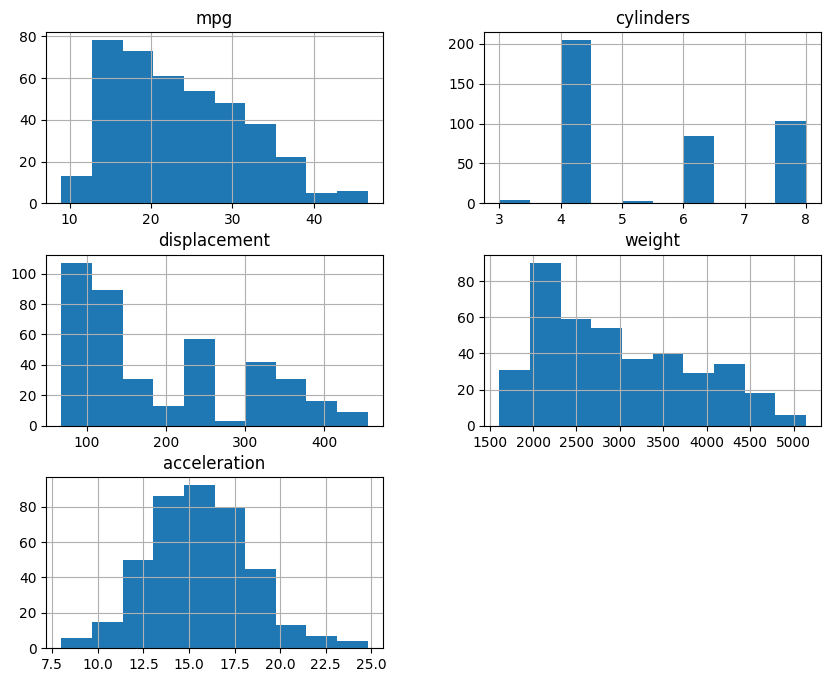

In [22]:
data.hist(figsize=(10, 8))
plt.show()

**4. Density Plot:**
   - The `data.plot(kind='density')` method utilizes the `pandas.plotting` module to create density plots for all numerical columns. Density plot are similar to histograms, but depict the probability density of the data, offering a smoother visualization of the distribution.

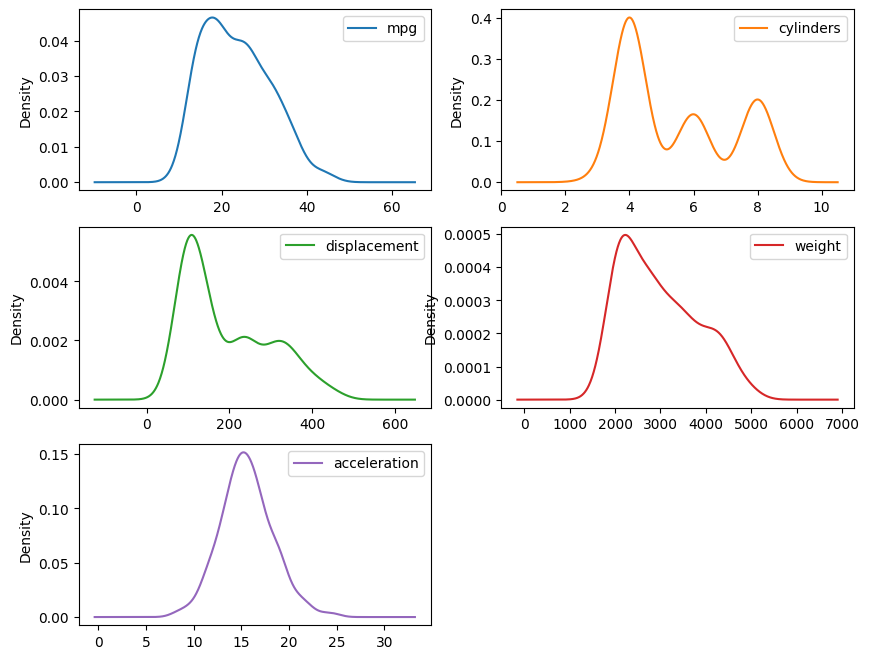

In [26]:
data.plot(kind='density', sharex=False, subplots=True, layout=(3, 2), figsize=(10, 8))
plt.show()

**5. Box Plot:**
   - The `data.plot(kind='box')` code leverages `pandas.plottong` to generate box plots for all numerical columns. Box plots display the distribution of data points using quartiles (25<sup>th</sup>, 50<sup>th</sup>, and 75<sup>th</sup> percentiles) and potential outliers.

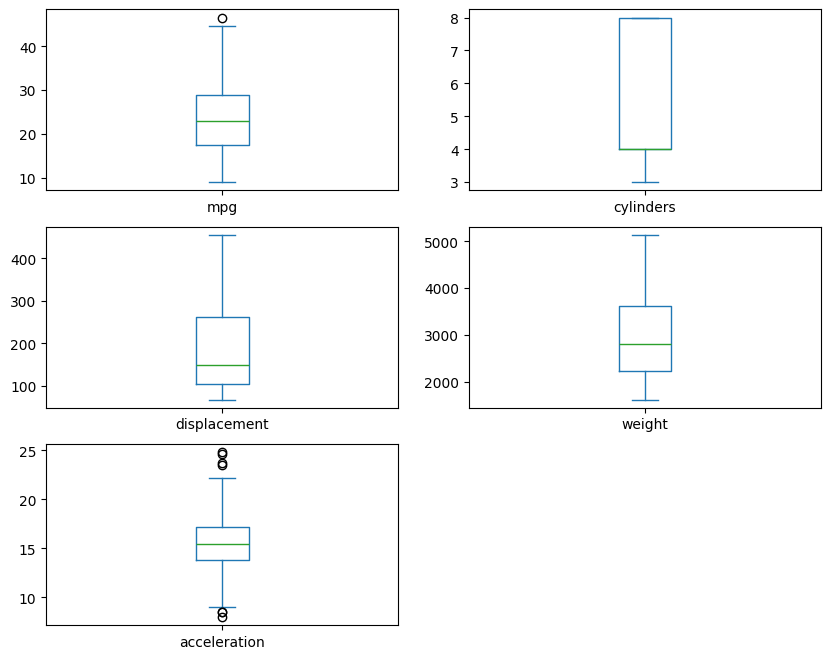

In [27]:
data.plot(kind='box', sharex=False, subplots=True, layout=(3, 2), figsize=(10, 8))
plt.show()

**6. Correlation Heatmap:**
   - The `sns.heatmap(data.corr(), annot=True)` code from the seaborn library creates a correlation heatmap to visualize the pairwise correlations between all numerical columns in the DataFrame. The correlation coefficient measure the strength and direction of the linear relationship between two variables. The heatmap provides a color-coded representation of these correlations, allowing you to identify potential relationships between features that might be relevant for you analysis.

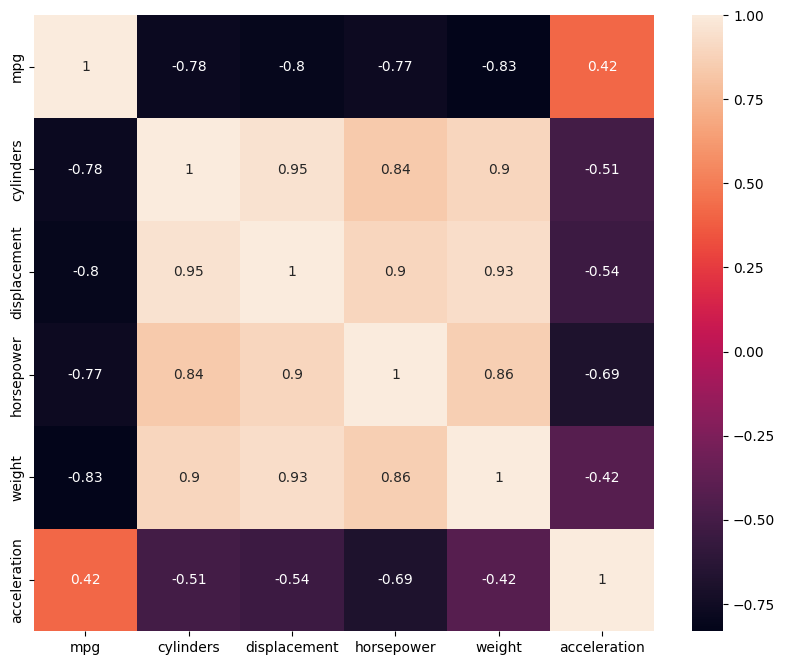

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**7. Scatter Matrix:**
   - The `pd.plotting.scatter_matrix(data)` code from `pandas.plotting` module generates a scatter matrix, displaying all pairwise scatter plots between numerical columns in the DataFrame. Scatter plots visually depict the relationship between two variable, helping to identify potential linear or non-linear relationship.

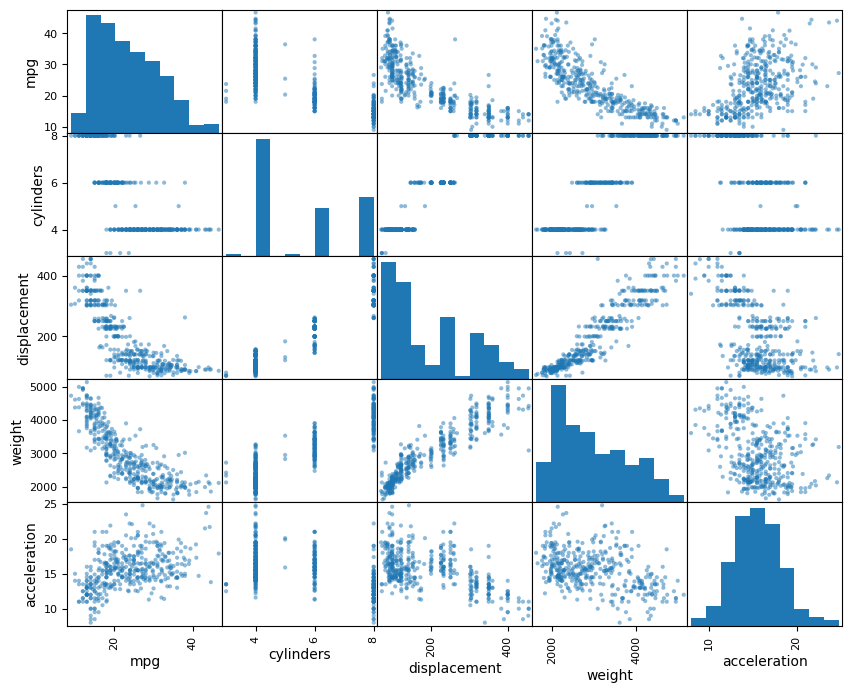

In [31]:
pd.plotting.scatter_matrix(data, figsize=(10, 8))
plt.show()

**8. Pairplot with KDE:**
   - The `sns.pairplot(data, diag_kind='kde')` code from seaborn craetes a pairplot, similar `scatter_matrix` of `pandas` but with the diagonal plots replaced by kernel density estimation (KDE) plots. KDE plots are a smooth representation of the distribution of each variable. This visualization provides a more comprehensive view of the relationships between features and the distribution of individual variables.

By emplying these diverse exploratory data analysis techniques, you can gain valuable insights into the characteristics of your dataset, identify potential issues, and guide ffor further analysis or modelling steps.

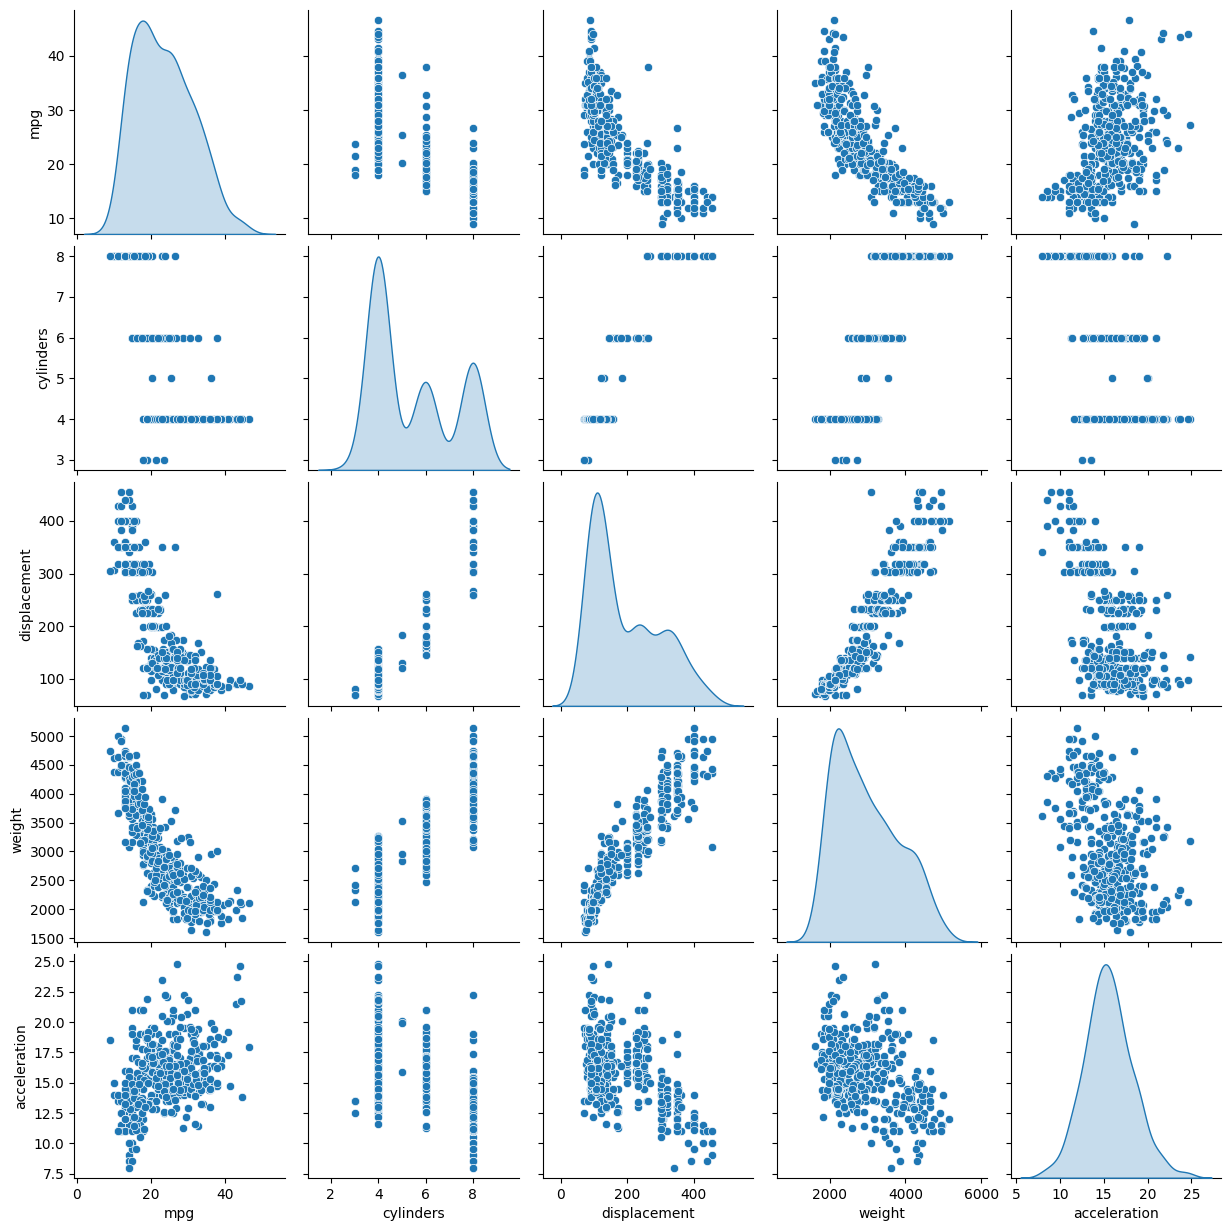

In [32]:
sns.pairplot(data, diag_kind='kde')
plt.show()

## Data Preparation for Regression

This section focuses on preparing the data for simple linear regression analysis. Here, the target variable and the feature variable are isolated, and the data is subsequently split into training and testing sets.

**1. Target and Feature Variable Selection**
- The target variable, representing the values to be predicted, is assigned to `y` by selecting the `mpg` (miles per gallon) column from the DataFrame `data`.
- The feature variable, considered to influence the target variable, is assigned to `x` by selecting the `weight` column from the DataFrame `data`.

In [39]:
y = np.asanyarray(data['mpg'])
x = np.asanyarray(data['weight']).reshape(-1, 1)

**2. Train / Test Split**
- The `train_test_split()` function from `scikit-learn` is employed to partition the data into training and testing sets. The split ensures a more robust evaluation of the model's performance, as the model is not directly exposed to the test data during training.
- The arguments are:
  - `x`: Feature variable (`weight`)
  - `y`: Target variable(`mpg`)
  - `test_size`: Allocates 20% of the data to the testing set and the remaining 80% to the training set.
  - `random_state`: Sets a seed for random number generatorm ensuring reproducibility  of the split if code is run multiple times.


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1000)

## Polynomial Regression

Here's the revised text in markdown format:

## Polynomial Regression: Capturing Non-Linear Relationships

Simple linear regression excels at modeling linear relationships between features and target variables. However, real-world data often exhibits non-linear trends, where a straight line wouldn't accurately capture the underlying pattern. 

**Polynomial Regression** addresses this challenge by introducing polynomial terms of the feature variable(s). These terms allow the model to represent curvature or bends in the data, resulting in a better fit for non-linear relationships.

**Understanding Polynomial Regression:**

In polynomial regression, the relationship between the independent variable `x` and the dependent variable `y` is modeled as an nth degree polynomial in `x`. Here's an example of a second-degree polynomial:


$y = ax^2 + bx + c$


where:

- `c` is the intercept (y-axis value when x is zero)
- `a` and `b` are the coefficients of the quadratic and linear terms, respectively

**Creating Polynomial Features:**

To fit our data to this equation, we need more than just the original `x` values (e.g., `weight`). We can create additional features by raising `x` to different powers. The `PolynomialFeatures()` function from `scikit-learn` automates this process. It generates a new feature set containing all polynomial combinations of the original features with degrees less than or equal to the specified value.

For instance, let's say our initial feature set consists of just one feature: `weight`. If we set the degree of the polynomial to 2, then `PolynomialFeatures()` creates three features:

1. Degree 0: Represents a constant term (equivalent to ***1*** in the equation)
2. Degree 1: Linear term (***x***)
3. Degree 2: Quadratic term (***x<sup>2</sup>***)

This transformed feature set allows the model to capture non-linear relationships between the feature and the target variable more effectively.

## Polynomial Regression Model: A Special Case of Linear Regression

While polynomial regression might seem like a completely different approach compared to multiple linear regression, it's actually a special case of it! The key difference lies in how we select and create the features used in the model.

**Understanding the Connection:**

Imagine we take the transformed data set generated by `fit_transform` (containing features like $x$, $x^2$, etc.) for a degree-2 polynomial. We can rename these features:

- $x$ (degree 1) becomes $x_1$
- $x^2$ (degree 2) becomes $x_2$

By doing this, the original degree-2 polynomial equation:

$y = ax^2 + bx + c$

transforms into:

$y = ax_2 + bx_1 + c$

This equation now resembles the structure of a multiple linear regression equation, where $x_1$ and $x_2$ are independent variables and $y$ is the dependent variable.

## Creating Polynomial Features with `fit_transform`

The `fit_transform` function from scikit-learn's `PolynomialFeatures` class plays a crucial role in polynomial regression. It takes our original feature data (`x`) and transforms it into a new feature set suitable for modeling non-linear relationships.

**Understanding the Transformation:**

Suppose we set the degree of the polynomial to 2 (quadratic). In this case, `fit_transform` performs the following actions:

1. **Generates New Features:** It creates additional features by raising the original features (`x_values`) to different powers from 0 to the specified degree (2 in this case). This results in three features:
   - A constant term (degree 0) represented by 1 (equivalent to `[1, ...]` in the output).
   - The original feature itself (degree 1) represented by `x_values`.
   - The squared term of the original feature (degree 2) represented by `x_values**2`.

2. **Transforms the Data:** It combines these newly created features with the original features to form a new transformed data set. This transformed data set is more suitable for capturing non-linear relationships between the features and the target variable.

**Visualizing the Transformation:**

The mathematical representation of this transformation can be expressed as:

$$
\begin{bmatrix}
v_1\\\\
v_2\\\\
\vdots\\\\
v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
 v_1^0 & v_1^1 & v_1^2\\\\
 v_2^0 & v_2^1 & v_2^2\\\\
\vdots & \vdots & \vdots\\\\
 v_n^0 & v_n^1 & v_n^2
\end{bmatrix}
$$

where:

- $v_i$ represents the i<sup>th</sup> value in your original feature vector (`x_values`).

For example, consider a sample data set:

```
x_values = [2265, 2515, 2220, ...]
```

Applying `fit_transform` with a degree of 2 would generate the following transformed data:

$$
\begin{bmatrix}
2265\\\\
2515\\\\
2220\\\\
\vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
 1 & 2265 & 5130225\\\\
 1 & 2515 & 6325225\\\\
 1 & 2220 & 4928400\\\\
\vdots & \vdots & \vdots\\\\
\end{bmatrix}
$$

As you can see, the original feature values (`2265`, `2515`, `2220`, etc.) are preserved, and additional columns containing their squares (`5130225`, `6325225`, `4928400`, etc.) are added. This expanded feature set allows the model to learn more complex relationships between the features and the target variable.

By understanding how `fit_transform` works, you gain valuable insights into how polynomial regression prepares data for modeling non-linear patterns.


In [44]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)

In [45]:
x_train[:5]

array([[2300],
       [3015],
       [4220],
       [3777],
       [2025]], dtype=int64)

In [46]:
x_train_poly[:5]

array([[1.0000000e+00, 2.3000000e+03, 5.2900000e+06],
       [1.0000000e+00, 3.0150000e+03, 9.0902250e+06],
       [1.0000000e+00, 4.2200000e+03, 1.7808400e+07],
       [1.0000000e+00, 3.7770000e+03, 1.4265729e+07],
       [1.0000000e+00, 2.0250000e+03, 4.1006250e+06]])

**Leveraging Linear Regression Machinery:**

Because of this similarity, we can treat the transformed data set from polynomial regression as suitable input for the `LinearRegression()` function from `scikit-learn`. The model will then internally handle the relationships between the features ($x_1$, $x_2$, etc.) learned during the transformation process.

In essence, polynomial regression leverages the existing machinery of linear regression to model non-linear relationships. It achieves this by creating new features that capture the curvature or bends in the data.

**Key Takeaway:**

Understanding polynomial regression as a special case of linear regression simplifies the modeling process. You can utilize familiar linear regression techniques while expanding your capabilities to handle non-linear data patterns.


Absolutely, I can revise the text for polynomial regression using the insights from the simple linear regression text and your provided code snippet:

**Model Building in Polynomial Regression:**

1. **Polynomial Feature Creation:**
   - The `PolynomialFeatures()` function from scikit-learn plays a crucial role. It transforms the original feature data (`x_train` in this case) to include polynomial terms up to a specified degree. This creates new features that capture non-linear relationships between features and the target variable.

2. **Model Instantiation:**
   - Similar to simple linear regression, we use `model = LinearRegression()` from scikit-learn to create a linear regression model. This model will be used to learn the relationship between the transformed features (containing polynomial terms) and the target variable (`y_train`).

3. **Model Fitting:**
   - The `model.fit(train_x_poly, y_train)` line trains the model. Here, `train_x_poly` represents the transformed training data generated by `PolynomialFeatures()`, and `y_train` is the target variable. During training, the model learns the coefficients for each feature (including the newly created polynomial terms) that best fit the data.

4. **Extracting Coefficients and Intercept:**
   - After fitting, you can access the model's coefficients using `model.coef_` and the intercept using `model.intercept_`. These values provide insights into the learned linear relationship between the features and the target variable.
      - Coefficients represent the weight or influence of each feature (including polynomial terms) on the target variable.
      - The intercept signifies the predicted value of the target variable when all features are zero (assuming a linear relationship between the transformed features).

In [47]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 0.00000000e+00 -1.73505886e-02  1.52530889e-06]
Intercept: 60.507455335991594


**Key Points:**

- Polynomial regression builds upon linear regression by creating new features that capture non-linearity.
- The core model fitting process remains similar to linear regression, using `LinearRegression()` for model creation and `model.fit()` for training.
- Interpreting the coefficients and intercept helps understand the relationships between the features (including polynomial terms) and the target variable.


## Model Predictions on Test Set

This section leverages the trained model to generate predictions for the unseen testing data.

**Prediction Generation:**
- the `model.predict(x_test)` method is used to make predictions on the testing set (`x_test`). The model applies the learned relationship between `weight` and `mpg` to predict the `mpg` values for the weight data points in the testing set. These predicted `mpg` values are stored in the `y_predict` variable.

By performing predictions on the testing set, you can access the model's generalization ability and evaluate its performance on unseen data. The next step will likely focus on this evaluation using appropriate metrics.

In [49]:
x_test_poly = poly.fit_transform(x_test)
y_pred = model.predict(x_test_poly)

## Model Evaluation - Predicted vs. Actual Values

This section delves into evaluating the model's performance by comparing the predicted `mpg` with the actual `mpg` values in the testing set.

**1. Comparison DataFrame Creation:**
    
- A `pandas` DataFrame named `frame` is constructed using `pd.DataFrame({'Weight': np.squeeze(x_test), 'Real MPG': y_test, 'Predicted MPG': y_pred})`. This DataFrame combines the actual `mpg` values from the testing set (`y_test`) in a column named `Real MPG`, and the predicted `mpg` values in a column named `Predicted MPG`.

In [50]:
frame = pd.DataFrame({'Weight': np.squeeze(x_test), 'Real MPG': y_test, 'Predicted MPG': y_pred})
frame

,Weight,Real MPG,Predicted MPG
0,4080,17.5,15.107956
1,3449,17.0,18.809741
2,3039,21.0,21.866039
3,1834,27.0,33.816938
4,2120,32.1,30.579556
...,...,...,...
75,4440,15.0,13.540171
76,2545,24.0,26.229671
77,2720,21.5,24.598700
78,2350,32.4,28.157091


**2. Visualization (Optional):**
- By examining the DataFrame on creating visualizations, you can gain valuable insights into the model's ability to accurately predict `mpg` values based on vehicle `weight`

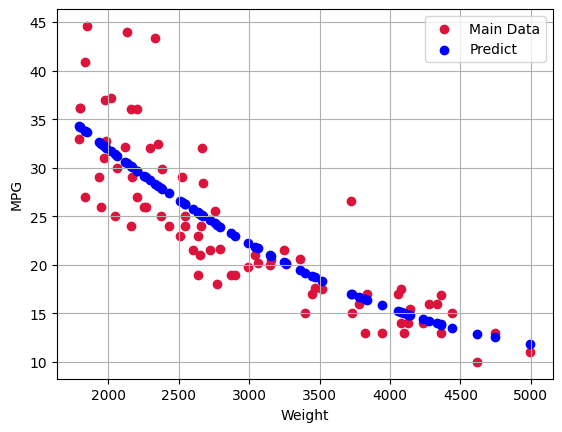

In [53]:
plt.scatter(x_test, y_test, color='crimson', label='Main Data')
plt.scatter(x_test, y_pred, color='blue', label='Predict')
plt.legend()
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.grid()
plt.show()

**Note:**
- Additonal metrics like **mean squared error (MSE)** or **R<sup>2</sup>** can be employed for more quantitative evaluation of the model's performance.

In [54]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('MSE:', mse)
print('R2:', r2)

MSE: 17.972281798074146
R2: 0.7386056897047639


## Visualizing the Relationship Between Weight and MPG

This section delves into visualizing the relationship between vehicle `weight` and `mpg` using two common `matplotlib` librariy:

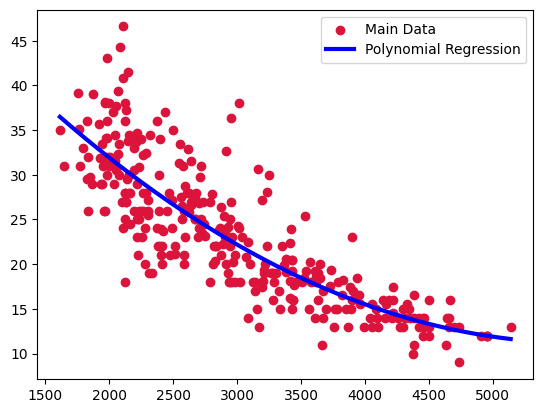

In [67]:
plt.scatter(x_train, y_train, color='crimson', label='Main Data')
x_reg = np.arange(x_train.min(), x_train.max(), 1)
y_reg = model.intercept_ + model.coef_[1] * x_reg + model.coef_[2] * x_reg ** 2
plt.plot(x_reg, y_reg, color='blue', lw=3, label='Polynomial Regression')
plt.legend()
plt.show()

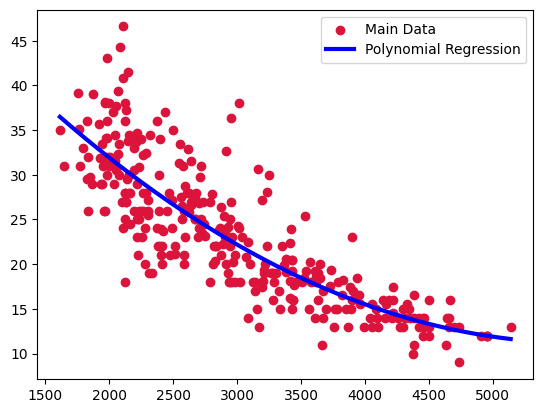

In [66]:
plt.scatter(x_train, y_train, color='crimson', label='Main Data')
x_reg = np.arange(x_train.min(), x_train.max(), 1)
y_reg = model.predict(poly.fit_transform(x_reg.reshape(-1, 1)))
plt.plot(x_reg, y_reg, color='blue', lw=3, label='Polynomial Regression')
plt.legend()
plt.show()